In [1]:
"""
TU/e BME Project Imaging 2019
Simple multiLayer perceptron code for MNIST
Author: Suzanne Wetstein
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import TensorBoard

C:\Users\Daniel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)

# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxH, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255


# convert 1D class arrays to 10D class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)


model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))

# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 


# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="Test model"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

In [3]:
# train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])
score = model.evaluate(X_test, y_test, verbose=0)
model.save('num_reader.model')

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 99us/step - loss: 0.7081 - acc: 0.8222 - val_loss: 0.4180 - val_acc: 0.8823
Epoch 2/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.3558 - acc: 0.9012 - val_loss: 0.3467 - val_acc: 0.8993
Epoch 3/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.3083 - acc: 0.9122 - val_loss: 0.3125 - val_acc: 0.9113
Epoch 4/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.2804 - acc: 0.9200 - val_loss: 0.2873 - val_acc: 0.9198
Epoch 5/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.2592 - acc: 0.9268 - val_loss: 0.2686 - val_acc: 0.9255
Epoch 6/10
54000/54000 [==============================] - 5s 86us/step - loss: 0.2416 - acc: 0.9317 - val_loss: 0.2536 - val_acc: 0.9298
Epoch 7/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.2269 - acc: 0.9359 - val_loss: 0.2417 - val_acc:

# Checking predictions

In [4]:
new = tf.keras.models.load_model('num_reader.model')
predictions = new.predict([X_test])
np.argmax(predictions[55]) #return index of max value 

0

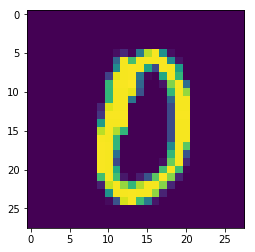

In [5]:
test = np.resize(X_test[55],(28,28))
plt.imshow(test)
plt.show()
